In [1]:
#importing necessary libraries

#for computation
import pandas as pd
import numpy as np
import math

#for visualisation
import matplotlib.pyplot as plt

#for scaling,metrics and tensorflow
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

#for building LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [2]:
df=pd.read_csv("AdaniSports_Stock.csv")

In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [4]:
#choosing the required feature
closed_price=df['Close']
closed_price.head()

0    962.90
1    893.90
2    884.20
3    921.55
4    969.30
Name: Close, dtype: float64

In [5]:
#Scaling the data using MinMax Scaler
sc=MinMaxScaler()
closed_price=sc.fit_transform(np.array(closed_price).reshape(-1,1)).squeeze()

In [6]:
#splitting the data
train_size=int(len(closed_price)*0.8)
test_size=len(closed_price)-train_size

train,test=closed_price[0:train_size],closed_price[train_size:len(closed_price)]

In [7]:
#converting to array
def create(dataset,seq_len):
    x,y=[],[]
    for i in range(len(dataset)-seq_len-1):
        x.append(dataset[i:i+seq_len])
        y.append(dataset[i+seq_len])
    return np.array(x),np.array(y)

seq_len=10
xtrain,ytrain=create(train,seq_len)
xtest,ytest=create(test,seq_len)

In [8]:
#reshape input to be [samples,time,steps,features]
xtrain=np.reshape(xtrain,(xtrain.shape[0],1,xtrain.shape[1]))
xtest=np.reshape(xtest,(xtest.shape[0],1,xtest.shape[1]))

In [9]:
#building model
model=Sequential()
model.add(LSTM(4,input_shape=(1,seq_len)))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(xtrain,ytrain,epochs=100,batch_size=300,verbose=1)

Epoch 1/100
9/9 [==============================] - 2s 2ms/step - loss: 0.0661
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0543
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0441
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0352
Epoch 5/100
9/9 [==============================] - 0s 374us/step - loss: 0.0304
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0261
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0195
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 10/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 11/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 12/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 13/100
9/9 [==============================] - 0s 1ms/

In [10]:
#prediction
trainpredict=model.predict(xtrain)
testpredict=model.predict(xtest)

21/21 [==============================] - 0s 842us/step


In [11]:
trainpredict=sc.inverse_transform(trainpredict)
ytrain=sc.inverse_transform([ytrain])
testpredict=sc.inverse_transform(testpredict)
ytest=sc.inverse_transform([ytest])

In [12]:
#finding out RMSE value

trainscore=math.sqrt(mean_squared_error(ytrain[0],trainpredict[:,0]))
print("trainscore: %.2f "%(trainscore))
testscore=math.sqrt(mean_squared_error(ytest[0],testpredict[:,0]))
print("test score: %.2f "%(testscore))

trainscore: 33.25 
test score: 24.23 


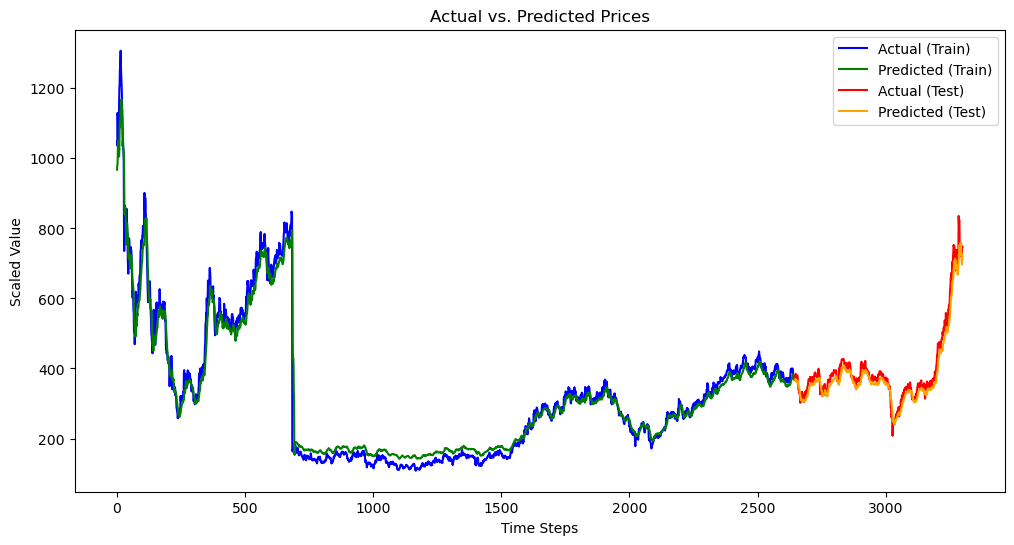

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(ytrain[0], label='Actual (Train)', color='blue')
plt.plot(trainpredict[:, 0], label='Predicted (Train)', color='green')
plt.plot(len(ytrain[0]) + np.arange(1, len(ytest[0]) + 1), ytest[0], label='Actual (Test)', color='red')
plt.plot(len(ytrain[0]) + np.arange(1, len(ytest[0]) + 1), testpredict[:, 0], label='Predicted (Test)', color='orange')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Value')
plt.legend()
plt.title('Actual vs. Predicted Prices')
plt.show()